# EDA(Exploratorty Data Anaysis) 탐색적 데이터 분석 

- 탐색적 자료 분석
- 데이터 분석 이전에 그래프나 통계적인 분석을 통해서 데이터를 직관적으로 이해하기 위한 과정
- 데이터 자체가 가지고 있는 그대로의 의미를 파악하기 위한 목적 

[목적]

- 데이터 수집 의사 결정
- 데이터에 맞는 모델 선정 
- 변수들 간 관계 파악 

[순서]

- 데이터 가져오기 및 모듈 세팅
- 데이터 정보 확인 
- 데이터 전처리
 - 결측치
 - 이상치 처리 
- 데이터를 시각화


## 데이터 (outlier.xlsx) 

### 데이터 불러오기 

In [1]:
import pandas as pd 

In [2]:
out_df = pd.read_excel('outlier.xlsx')
out_df

,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,810,100,78
3,4,80,120,21
4,5,88,67,29
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,-57,48,67
9,10,100,87,93


In [3]:
out_df.head()


,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,810,100,78
3,4,80,120,21
4,5,88,67,29


In [4]:
out_df.tail()


,번호,국어,수학,영어
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,-57,48,67
9,10,100,87,93


In [10]:
out_df = out_df.set_index('번호')
out_df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,810,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,-57,48,67


### 데이터 정보 확인 

In [11]:
out_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   국어      10 non-null     int64
 1   수학      10 non-null     int64
 2   영어      10 non-null     int64
dtypes: int64(3)
memory usage: 320.0 bytes


In [12]:
out_df.describe()


,국어,수학,영어
count,10.000000,10.000000,10.00000
mean,133.100000,77.300000,62.00000
std,242.093852,29.616249,29.06315
min,-57.000000,24.000000,21.00000
25%,54.500000,54.250000,35.25000
50%,75.000000,83.500000,68.00000
75%,89.500000,99.250000,87.00000
max,810.000000,120.000000,100.00000


### 이상치 처리하기 

- outlier : 사분위에서 특정 범위(+- IQR * 1.5)를 초과하는 경우

In [8]:
import matplotlib.pyplot as plt


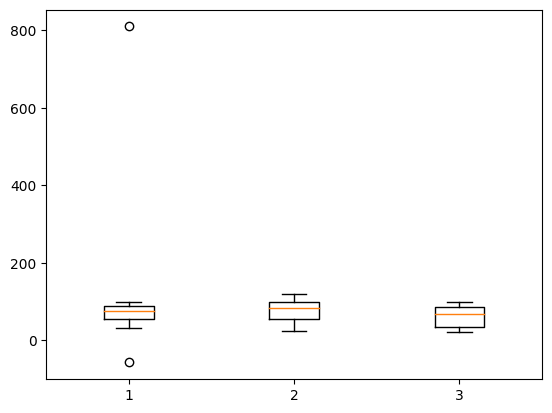

In [15]:
# 이상치를 확인하기 위해서 박스플롯을 확인 

plt.boxplot(out_df)
plt.show()

# 국어 과목에서 이상치가 발견되었음

In [16]:
# 국어 점수 이상치를 replace를 활용해서 값을 변경함.
out_df['국어'] = out_df['국어'].replace(810, 81).replace(-57, 57)
out_df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,81,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,57,48,67


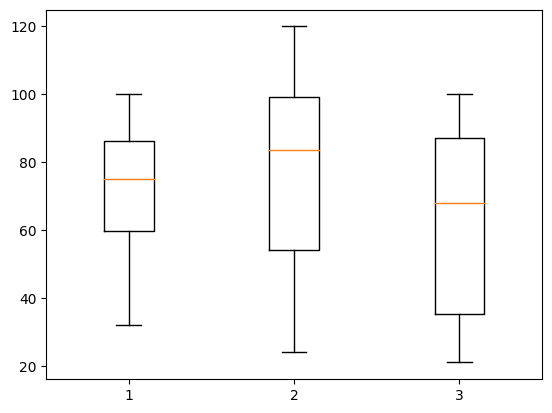

In [17]:
# 이상치 처리가 잘되었는지 확인.

plt.boxplot(out_df)
plt.show()

### 데이터 시각화 

In [22]:
# matplotlib을 사용할 때 한글이 깨지지 않게 만들어주는 라이브러리
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 34.5 MB/s eta 0:00:00


In [23]:
import koreanize_matplotlib # 한글이 깨지지 않게 해주는 모듈 

In [24]:
import matplotlib.pyplot as plt

In [ ]:
# 1반 학생들의 국어 (수학, 영어) 성적 평균
# 과목별로 최대 최소값
# 순서대로 -> 사분위값 -> 상위 몇 %

In [25]:
# 학생들의 국어, 수학, 영어 성적 평균 

out_df.mean()

국어    71.6
수학    77.3
영어    62.0
dtype: float64

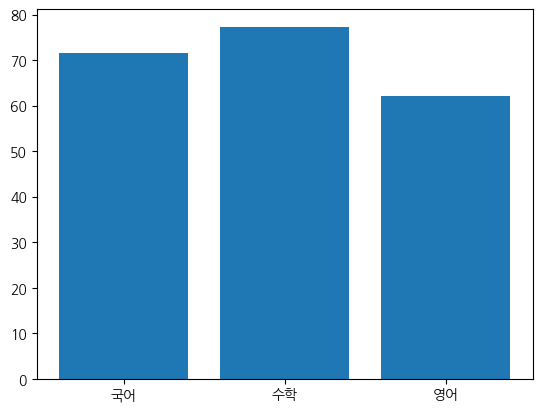

In [26]:
plt.bar(out_df.mean().index, out_df.mean())
plt.show()

In [28]:
# 과목별로 최대 최소 값
print(out_df.max())
print(out_df.min())

국어    100
수학    120
영어    100
dtype: int64
국어    32
수학    24
영어    21
dtype: int64


In [ ]:
# 순서대로 -> 사분위값 -> 상위 몇 %
q1 = out_df.quantile(0.25)
q2 = out_df.quantile(0.5)
q3 = out_df.quantile(0.75)

In [ ]:
# IQR
IQR = q3 - q1

# [-1.5 * IQR < 데이터 < 1.5 * IQR ] 일반적인 데이터 허용 범위 
# 이 범위 벗어난 데이터는 이상치입니다.

IQR

## 데이터 (weather.csv)

### 데이터 불러오기

In [37]:
weather_df = pd.read_csv('weather.csv', encoding='cp949')
weather_df

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
0,2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
1,2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2,2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
3,2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
4,2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...,...
360,2010.12.27,-0.1,6.7,0.0,20.3,3.8,284.1
361,2010.12.28,1.0,8.8,0.0,15.5,5.2,227.8
362,2010.12.29,-0.5,5.9,0.5,19.1,4.4,323.3
363,2010.12.30,-4.4,5.1,5.5,18.8,5.8,278.3


In [31]:
weather_df.head()

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
0,2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
1,2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2,2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
3,2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
4,2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3


In [32]:
weather_df.tail()

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
360,2010.12.27,-0.1,6.7,0.0,20.3,3.8,284.1
361,2010.12.28,1.0,8.8,0.0,15.5,5.2,227.8
362,2010.12.29,-0.5,5.9,0.5,19.1,4.4,323.3
363,2010.12.30,-4.4,5.1,5.5,18.8,5.8,278.3
364,2010.12.31,-4.4,-1.0,15.0,19.2,6.3,284.1


### 데이터 정보 확인 

In [33]:
weather_df.info()
# 결측치가 존재한다는 것을 알 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   일시                 365 non-null    object 
 1   최저기온(°C)           359 non-null    float64
 2   최고기온(°C)           359 non-null    float64
 3   일강수량(mm)           359 non-null    float64
 4   최대 순간 풍속(m/s)      359 non-null    float64
 5   평균 풍속(m/s)         357 non-null    float64
 6   최대 순간 풍속 풍향(hhmi)  359 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


In [34]:
weather_df.describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,359.000000,359.000000,359.000000,359.000000,357.000000,359.000000
mean,10.023677,17.618384,8.679666,12.179944,4.378151,186.905571
std,8.804447,8.415890,22.873447,5.276340,1.627493,119.173462
min,-5.300000,-1.400000,0.000000,4.300000,1.400000,0.000000
25%,1.950000,11.400000,0.000000,7.950000,3.200000,61.900000
50%,9.500000,17.500000,0.000000,11.000000,4.100000,202.500000
75%,17.200000,25.000000,4.250000,14.950000,5.400000,320.600000
max,25.700000,34.000000,166.500000,32.900000,10.000000,357.200000


In [38]:
# index 설정 

weather_df = weather_df.set_index('일시')


Index(['2010.1.1', '2010.1.2', '2010.1.3', '2010.1.4', '2010.1.5', '2010.1.6',
       '2010.1.7', '2010.1.8', '2010.1.9', '2010.1.10',
       ...
       '2010.12.22', '2010.12.23', '2010.12.24', '2010.12.25', '2010.12.26',
       '2010.12.27', '2010.12.28', '2010.12.29', '2010.12.30', '2010.12.31'],
      dtype='object', name='일시', length=365)

In [39]:
# pd.to_datetime

weather_df.index = pd.to_datetime(weather_df.index, format = '%Y-%m-%d')
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...
2010-12-27,-0.1,6.7,0.0,20.3,3.8,284.1
2010-12-28,1.0,8.8,0.0,15.5,5.2,227.8
2010-12-29,-0.5,5.9,0.5,19.1,4.4,323.3


### 결측치 확인하기

In [40]:
# 결측치 확인 (컬럼별로 개수 확인)
weather_df.isnull().sum()
weather_df.isna().sum()

최저기온(°C)             6
최고기온(°C)             6
일강수량(mm)             6
최대 순간 풍속(m/s)        6
평균 풍속(m/s)           8
최대 순간 풍속 풍향(hhmi)    6
dtype: int64

In [49]:
# 결측치 확인 (최저기온의 어느 날짜가 비어 있는지 확인)

weather_df['최저기온(°C)'][weather_df['최저기온(°C)'].isnull()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최저기온(°C), dtype: float64

In [50]:
# 결측치 확인 (최고기온의 어느 날짜가 비어 있는지)
weather_df['최고기온(°C)'][weather_df['최고기온(°C)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최고기온(°C), dtype: float64

In [51]:
# 결측치 확인 (일강수량의 어느 날짜가 비어 있는지)

weather_df['일강수량(mm)'][weather_df['일강수량(mm)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 일강수량(mm), dtype: float64

In [52]:
weather_df['최대 순간 풍속(m/s)'][weather_df['최대 순간 풍속(m/s)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최대 순간 풍속(m/s), dtype: float64

In [53]:
weather_df['평균 풍속(m/s)'][weather_df['평균 풍속(m/s)'].isna()]

일시
2010-12-07   NaN
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
2010-12-14   NaN
Name: 평균 풍속(m/s), dtype: float64

In [54]:
weather_df['최대 순간 풍속 풍향(hhmi)'][weather_df['최대 순간 풍속 풍향(hhmi)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최대 순간 풍속 풍향(hhmi), dtype: float64

In [55]:
# 대부분의 결측치가 12월에 있으므로 
# 12월 데이터만 확인해보기.

weather_df.loc['2010-12-07':'2010-12-14']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-10,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-11,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-12,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-13,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-14,-0.8,2.9,0.0,26.7,NaN,300.8


### 결측치 처리하기 

In [56]:
# weather_df은 시간의 흐름에 따른 데이터 즉 시계열 데이터
# 결측치를 처리하기 위해선 데이터의 경향을 파악해야합니다.

weather_df['2010-12-01':'2010-12-31']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-01,6.2,16.4,0.0,6.3,3.1,25.2
2010-12-02,6.2,12.2,7.5,9.4,3.9,14.1
2010-12-03,2.0,11.4,0.0,18.4,5.2,50.5
2010-12-04,-0.5,11.3,0.0,8.3,2.9,39.4
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# 일강수량의 경향을 확인했을 때 0으로 채우는 것이 좋을 것 같다.

weather_df['일강수량(mm)'] = weather_df['일강수량(mm)'].fillna(0)


,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...
2010-12-27,-0.1,6.7,0.0,20.3,3.8,284.1
2010-12-28,1.0,8.8,0.0,15.5,5.2,227.8
2010-12-29,-0.5,5.9,0.5,19.1,4.4,323.3


In [59]:
# 최저기온, 최고기온의 결측값은 사분위수 값인 Q2의 값으로 채우는 것이 좋을 것 같다.

weather_df['2010-12-05': '2010-12-15']
weather_df.loc['2010-12-05': '2010-12-15']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-09,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-10,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-11,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-12,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-13,NaN,NaN,0.0,NaN,NaN,NaN


In [60]:
weather_df.describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,359.000000,359.000000,365.000000,359.000000,357.000000,359.000000
mean,10.023677,17.618384,8.536986,12.179944,4.378151,186.905571
std,8.804447,8.415890,22.711052,5.276340,1.627493,119.173462
min,-5.300000,-1.400000,0.000000,4.300000,1.400000,0.000000
25%,1.950000,11.400000,0.000000,7.950000,3.200000,61.900000
50%,9.500000,17.500000,0.000000,11.000000,4.100000,202.500000
75%,17.200000,25.000000,4.000000,14.950000,5.400000,320.600000
max,25.700000,34.000000,166.500000,32.900000,10.000000,357.200000


In [62]:
weather_df['최저기온(°C)'] = weather_df['최저기온(°C)'].fillna(0.4)
weather_df['최고기온(°C)'] = weather_df['최고기온(°C)'].fillna(2.9)

In [63]:
# 최대 순간 풍속의 결측값은 12/6 ~ 12/15 까지의 평균값으로 대체한다.

weather_df['최대 순간 풍속(m/s)'] = weather_df['최대 순간 풍속(m/s)'].fillna(24.1)
weather_df.loc['2010-12-06':'2010-12-15']


,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,0.4,2.9,0.0,24.1,NaN,NaN
2010-12-09,0.4,2.9,0.0,24.1,NaN,NaN
2010-12-10,0.4,2.9,0.0,24.1,NaN,NaN
2010-12-11,0.4,2.9,0.0,24.1,NaN,NaN
2010-12-12,0.4,2.9,0.0,24.1,NaN,NaN
2010-12-13,0.4,2.9,0.0,24.1,NaN,NaN
2010-12-14,-0.8,2.9,0.0,26.7,NaN,300.8


In [64]:
# 평균 풍속의 결측값은 12/4 ~ 12/18 까지의 평균값으로 대체 
weather_df['2010-12-04':'2010-12-18'].describe()


,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,15.000000,15.000000,15.000000,15.000000,7.000000,9.000000
mean,-0.100000,5.333333,0.333333,19.700000,4.642857,223.388889
std,1.520338,4.349494,1.290994,6.676933,2.359984,121.731020
min,-3.200000,1.300000,0.000000,8.300000,2.900000,14.100000
25%,-0.650000,2.900000,0.000000,13.000000,3.250000,165.800000
50%,0.400000,2.900000,0.000000,24.100000,3.400000,284.100000
75%,0.400000,8.100000,0.000000,24.100000,5.550000,300.800000
max,2.800000,13.800000,5.000000,26.700000,8.600000,340.200000


In [65]:
weather_df['평균 풍속(m/s)'] = weather_df['평균 풍속(m/s)'].fillna(4.642857)

In [66]:
# 최대 순간 풍속 풍향의 결측값은 12/7~12/17 까지의 평균값으로 대체.
weather_df['2010-12-07':'2010-12-17'].describe()


,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,11.000000,11.000000,11.000000,11.000000,11.000000,5.000000
mean,-0.481818,2.972727,0.454545,22.000000,4.694805,305.380000
std,1.389114,1.475189,1.507557,4.775353,1.037585,23.931506
min,-3.200000,1.300000,0.000000,11.800000,3.400000,284.100000
25%,-1.000000,2.450000,0.000000,22.350000,4.642857,284.100000
50%,0.400000,2.900000,0.000000,24.100000,4.642857,300.800000
75%,0.400000,2.900000,0.000000,24.100000,4.642857,317.700000
max,0.400000,7.100000,5.000000,26.700000,7.500000,340.200000


In [67]:
weather_df['최대 순간 풍속 풍향(hhmi)'] = weather_df['최대 순간 풍속 풍향(hhmi)'].fillna(305.38)


In [69]:
weather_df.isna().sum()

최저기온(°C)             0
최고기온(°C)             0
일강수량(mm)             0
최대 순간 풍속(m/s)        0
평균 풍속(m/s)           0
최대 순간 풍속 풍향(hhmi)    0
dtype: int64

In [68]:
weather_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   최저기온(°C)           365 non-null    float64
 1   최고기온(°C)           365 non-null    float64
 2   일강수량(mm)           365 non-null    float64
 3   최대 순간 풍속(m/s)      365 non-null    float64
 4   평균 풍속(m/s)         365 non-null    float64
 5   최대 순간 풍속 풍향(hhmi)  365 non-null    float64
dtypes: float64(6)
memory usage: 28.1 KB


### 데이터 시각화 

In [70]:
# matplotlib을 사용할 때 한글이 깨지지 않게 만들어주는 라이브러리
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
import matplotlib.pyplot as plt
import koreanize_matplotlib # 한글이 깨지지 않게 해주는 모듈 

In [72]:
x = weather_df.index # 시간 순서
y1 = weather_df['최저기온(°C)']
y2 = weather_df['최고기온(°C)']
y3 = weather_df['일강수량(mm)']
y4 = weather_df['최대 순간 풍속(m/s)']
y5 = weather_df['평균 풍속(m/s)']
y6 = weather_df['최대 순간 풍속 풍향(hhmi)']

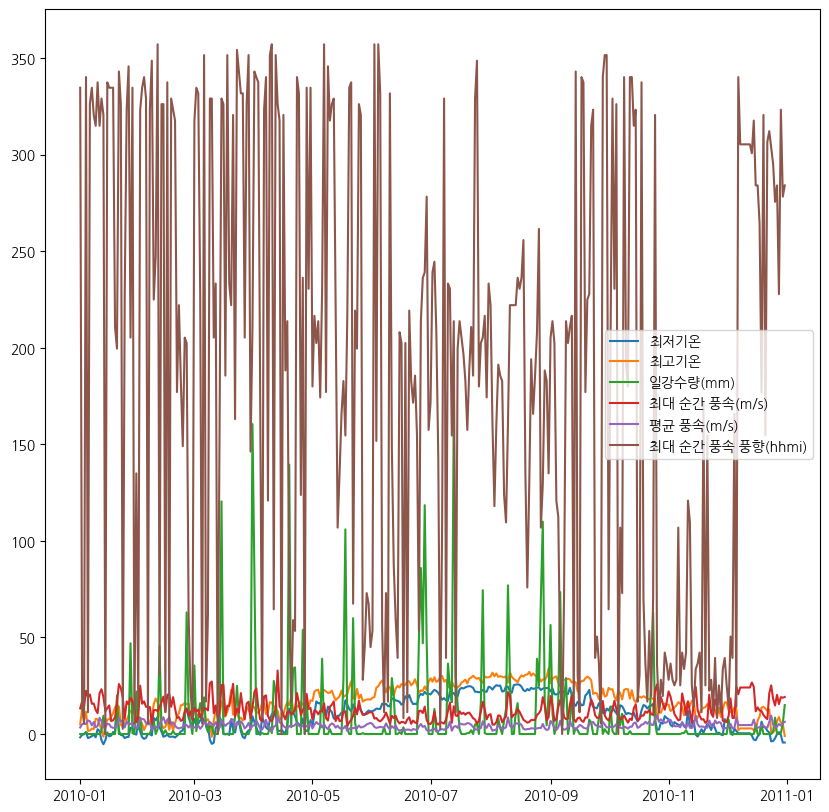

In [73]:
plt.figure(figsize=(10, 10)) # 그래프 사이즈 
plt.plot(x, y1, label = '최저기온') # 그래프 그리기
plt.plot(x, y2, label = '최고기온') # 그래프 그리기
plt.plot(x, y3, label = '일강수량(mm)') # 그래프 그리기
plt.plot(x, y4, label = '최대 순간 풍속(m/s)') # 그래프 그리기
plt.plot(x, y5, label = '평균 풍속(m/s)') # 그래프 그리기
plt.plot(x, y6, label = '최대 순간 풍속 풍향(hhmi)') # 그래프 그리기
plt.legend()

plt.show() # 그래프 출력

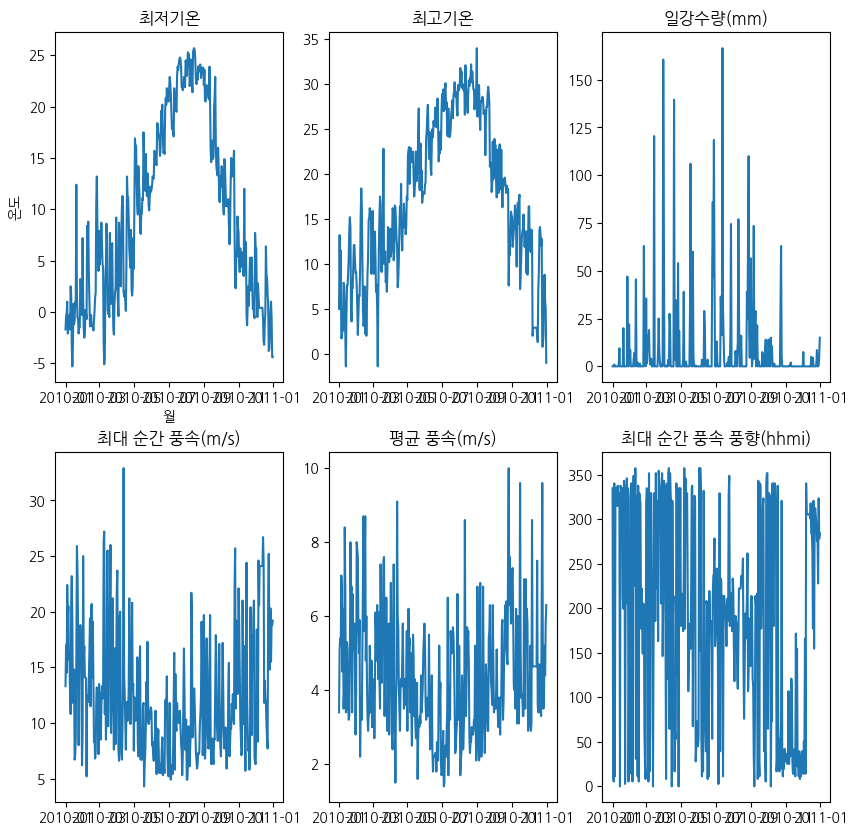

In [75]:
plt.figure(figsize=(10, 10))

# subplot
# subplot(행, 열, 인덱스)


plt.subplot(2, 3, 1)
plt.plot(x, y1, label = '최저기온')
plt.title('최저기온')
plt.xlabel('월')
plt.ylabel('온도')

plt.subplot(2, 3, 2)
plt.plot(x, y2)
plt.title('최고기온')

plt.subplot(2, 3, 3)
plt.plot(x, y3)
plt.title('일강수량(mm)')

plt.subplot(2, 3, 4)
plt.plot(x, y4)
plt.title('최대 순간 풍속(m/s)')


plt.subplot(2, 3, 5)
plt.plot(x, y5)
plt.title('평균 풍속(m/s)')


plt.subplot(2, 3, 6)
plt.plot(x, y6)
plt.title('최대 순간 풍속 풍향(hhmi)')

plt.show()

In [76]:
# 월 컬럼 추가

weather_date = pd.Series(weather_df.index)
weather_date.dt.month 


0       1
1       1
2       1
3       1
4       1
       ..
360    12
361    12
362    12
363    12
364    12
Name: 일시, Length: 365, dtype: int64

In [77]:
# weather_df['월'] = weather_date.dt.month 으로 인덱스가 다르기 때문에 월 컬럼이 들어가지 않는다.
# 그래서 벨류만 뽑아서 넣어야함. 
weather_df['월'] = weather_date.dt.month.values
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7,1
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1,1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5,1
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2,1
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3,1
...,...,...,...,...,...,...,...
2010-12-27,-0.1,6.7,0.0,20.3,3.8,284.1,12
2010-12-28,1.0,8.8,0.0,15.5,5.2,227.8,12
2010-12-29,-0.5,5.9,0.5,19.1,4.4,323.3,12


In [79]:
# groupby

# 월별 최저기온 평균
weather_df.groupby(weather_df['월'])['최저기온(°C)'].mean()

월
1      0.190323
2      2.132143
3      3.048387
4      5.450000
5     11.906452
6     16.816667
7     21.722581
8     23.812903
9     17.960000
10    10.709677
11     3.683333
12     0.348387
Name: 최저기온(°C), dtype: float64

In [80]:
# 월별 최저기온 평균
month_low_temp = weather_df.groupby(weather_df['월'])['최저기온(°C)'].mean()
# 월별 최고기온 평균
month_high_temp = weather_df.groupby(weather_df['월'])['최고기온(°C)'].mean()

# 월별 일강수량(mm) 평균
month_daily_vol = weather_df.groupby(weather_df['월'])['일강수량(mm)'].mean()

# 월별 최대 순간 풍속(m/s) 평균
month_wind_speed = weather_df.groupby(weather_df['월'])['최대 순간 풍속(m/s)'].mean()

# 월별 평균 풍속(m/s)	 평균
month_wind_mean = weather_df.groupby(weather_df['월'])['평균 풍속(m/s)'].mean()

# 월별 최대 순간 풍속 풍향(hhmi) 평균
month_wind_dic = weather_df.groupby(weather_df['월'])['최대 순간 풍속 풍향(hhmi)'].mean()

In [81]:
x_month = weather_df['월'].unique()
x_month

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

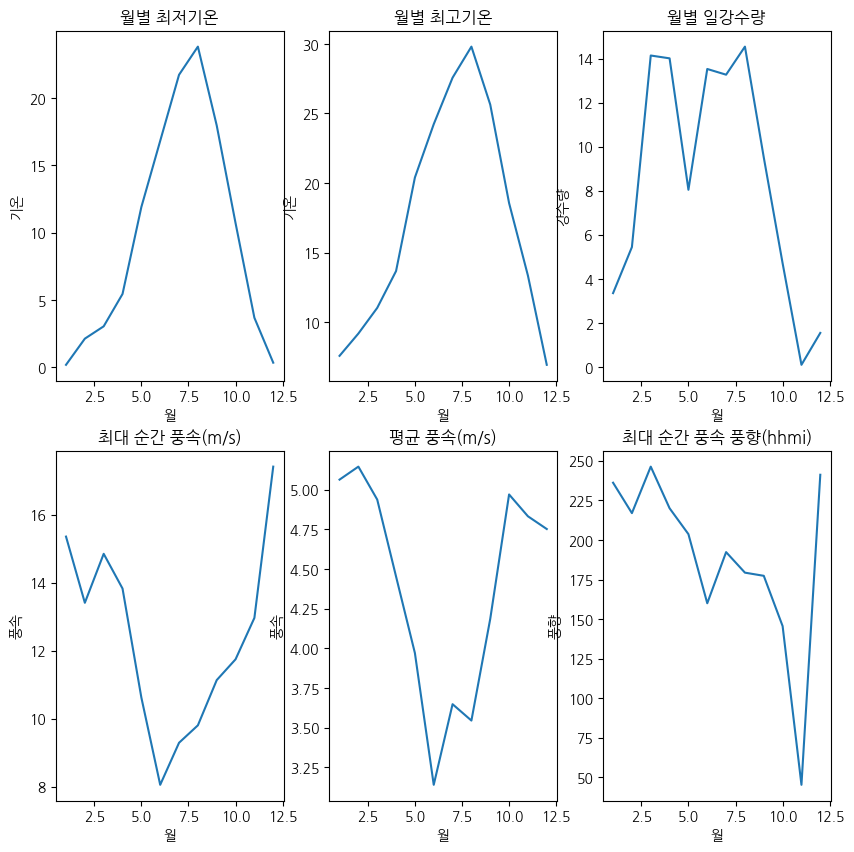

In [82]:
# groupby 월별데이터 -> 평균 -> 그래프 

plt.figure(figsize=(10, 10))


# 1
plt.subplot(2, 3, 1)
plt.title('월별 최저기온')
plt.ylabel('기온')
plt.xlabel('월')
plt.plot(x_month, month_low_temp)

# 2
plt.subplot(2, 3, 2)
plt.title('월별 최고기온')
plt.ylabel('기온')
plt.xlabel('월')

plt.plot(x_month ,month_high_temp)

# 3
plt.subplot(2, 3, 3)
plt.title('월별 일강수량')
plt.ylabel('강수량')
plt.xlabel('월')
plt.plot(x_month, month_daily_vol)

# 4
plt.subplot(2, 3, 4)
plt.title('최대 순간 풍속(m/s)')
plt.ylabel('풍속')
plt.xlabel('월')
plt.plot(x_month, month_wind_speed)

# 5
plt.subplot(2, 3, 5)
plt.title('평균 풍속(m/s)')
plt.ylabel('풍속')
plt.xlabel('월')
plt.plot(x_month, month_wind_mean)

# 6
plt.subplot(2, 3, 6)
plt.title('최대 순간 풍속 풍향(hhmi)')
plt.ylabel('풍향')
plt.xlabel('월')
plt.plot(x_month, month_wind_dic)

plt.show()

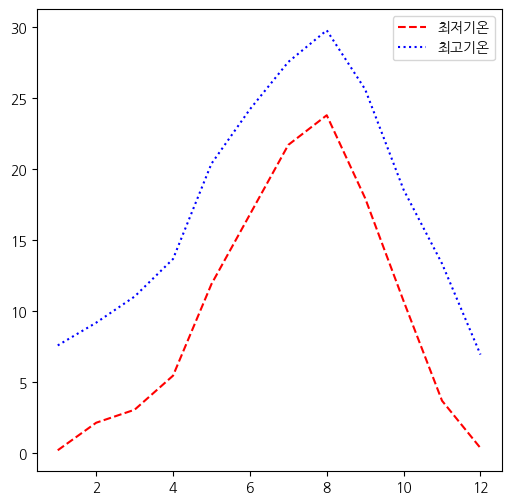

In [85]:
# 기온 그래프를 하나의 그래프로 표시 

plt.figure(figsize=(6, 6))

plt.plot(x_month, month_low_temp, 'r--', label = '최저기온')
plt.plot(x_month ,month_high_temp, 'b:', label = '최고기온')
# 색상
# b: blue, r: red, ..
# 선 
# -- 대쉬라인, -. dash dot, : dot, - 라인 ...
plt.legend(loc = 'best')
# 범례 위치: upper left, upper center, center(left, right), ...

plt.show()

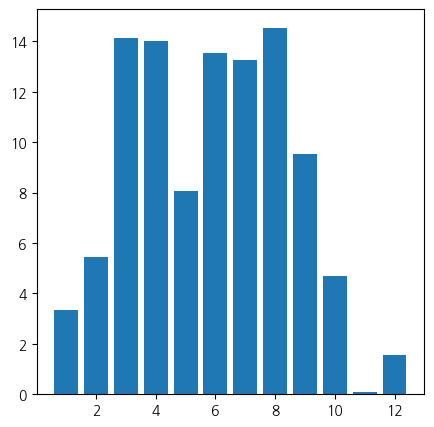

In [84]:
# 일 강수량을 바 그래프로 나타내기 

plt.figure(figsize=(5, 5))

plt.bar(x_month, month_daily_vol)

plt.show()

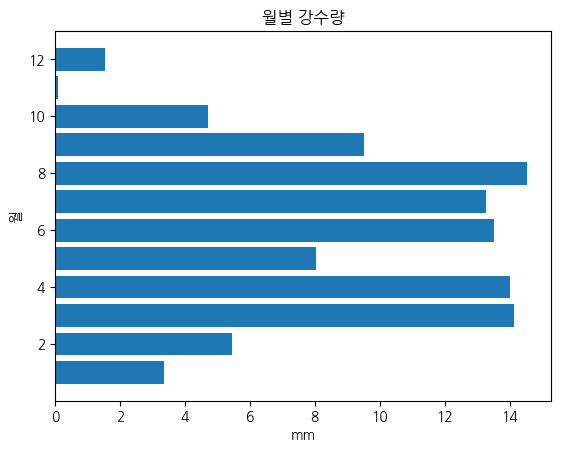

In [86]:
plt.barh(x_month, month_daily_vol)
plt.title('월별 강수량')
plt.xlabel('mm')
plt.ylabel('월')
plt.show()

In [87]:
# 1월 데이터 
month_1 = weather_df[weather_df['월']==1]
month_1.head()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7,1
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1,1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5,1
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2,1
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3,1


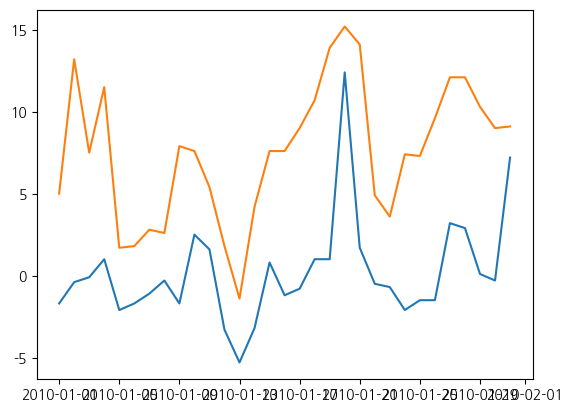

In [88]:
plt.plot(month_1['최저기온(°C)'], label = '최저기온')
plt.plot(month_1['최고기온(°C)'], label = '최고기온')

plt.show()

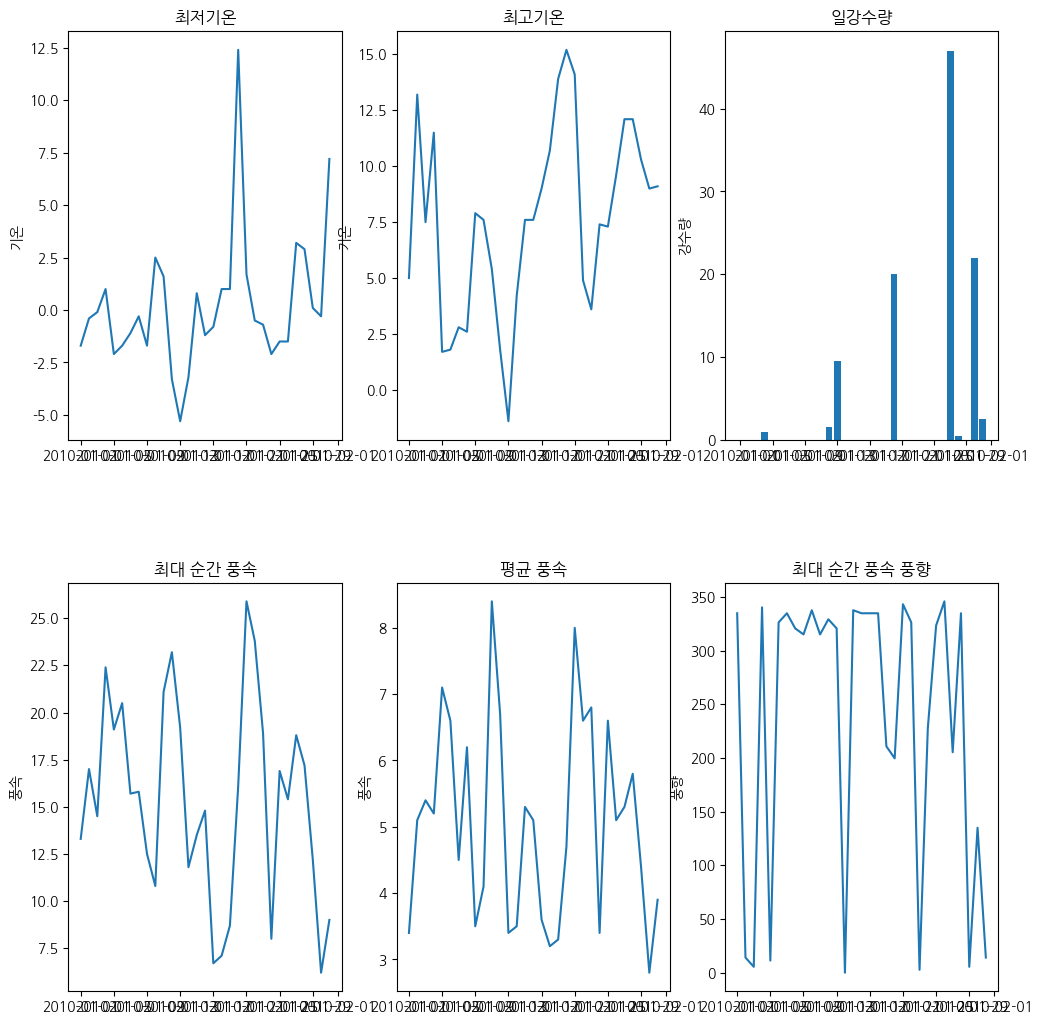

In [90]:
# 1월 데이터를 subplot 이용해서 2x3으로 그려주세요. -> 강수량은 bar그래프로

plt.figure(figsize=(12, 12))

# subplots 간의 간격조정 
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

plt.subplot(2, 3, 1)
plt.plot(month_1['최저기온(°C)'])
plt.title('최저기온')
plt.ylabel('기온')

plt.subplot(2, 3, 2)
plt.plot(month_1['최고기온(°C)'])
plt.title('최고기온')
plt.ylabel('기온')

plt.subplot(2, 3, 3)
plt.bar(month_1.index, month_1['일강수량(mm)']) # x, y를 정해야합니다.
plt.title('일강수량')
plt.ylabel('강수량')

plt.subplot(2, 3, 4)
plt.plot(month_1['최대 순간 풍속(m/s)'])
plt.title('최대 순간 풍속')
plt.ylabel('풍속')

plt.subplot(2, 3, 5)
plt.plot(month_1['평균 풍속(m/s)'])
plt.title('평균 풍속')
plt.ylabel('풍속')

plt.subplot(2, 3, 6)
plt.plot(month_1['최대 순간 풍속 풍향(hhmi)'])
plt.title('최대 순간 풍속 풍향')
plt.ylabel('풍향')

plt.show()

## 데이터 (jeju_food.xlsx) 

- 제주도 음식점 데이터

- 출처: 한국 관광 데이터 랩(https://datalab.visitkorea.or.kr/datalab/portal/main/getMainForm.do)


In [91]:
food = pd.read_excel('jeju_food.xlsx')

In [92]:
food.head()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,우진해장국,제주특별자치도,제주시,제주 제주시 서사로 11-0,음식,한식,108360
1,2,오는정김밥,제주특별자치도,서귀포시,제주 서귀포시 동문동로 2-0,음식,간이음식,71762
2,3,카페노티드제주,제주특별자치도,제주시,제주 제주시 애월로1길 24-9,음식,카페/찻집,70229
3,4,자매국수본점,제주특별자치도,제주시,제주 제주시 탑동로11길 6-0,음식,한식,66310
4,5,원앤온리,제주특별자치도,서귀포시,제주 서귀포시 산방로 141-0,음식,카페/찻집,61219


In [93]:
food.tail()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
495,496,아라파파,제주특별자치도,제주시,제주 제주시 북촌15길 60-0,음식,간이음식,3559
496,497,애월연어,제주특별자치도,제주시,제주 제주시 하소로 660-0,음식,전문음식,3556
497,498,춘미향식당,제주특별자치도,서귀포시,제주 서귀포시 산방로 378-0,음식,한식,3552
498,499,서울앵무새제주점,제주특별자치도,서귀포시,제주 서귀포시 색달중앙로 162-0,음식,카페/찻집,3551
499,500,오후새우시,제주특별자치도,서귀포시,제주 서귀포시 천제연로 184-0,음식,한식,3542


### 데이터 정보 확인 


In [95]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   순위        500 non-null    int64 
 1   관광지명      500 non-null    object
 2   광역시/도     500 non-null    object
 3   시/군/구     500 non-null    object
 4   도로명주소     500 non-null    object
 5   중분류 카테고리  500 non-null    object
 6   소분류 카테고리  500 non-null    object
 7   검색건수      500 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [96]:
food.describe()

,순위,검색건수
count,500.000000,500.000000
mean,250.468000,8898.482000
std,144.454807,9624.024732
min,1.000000,3542.000000
25%,125.750000,4340.750000
50%,250.500000,5694.500000
75%,375.250000,9107.250000
max,500.000000,108360.000000


In [98]:
# 결측치가 없음.
food.isna().sum()

순위          0
관광지명        0
광역시/도       0
시/군/구       0
도로명주소       0
중분류 카테고리    0
소분류 카테고리    0
검색건수        0
dtype: int64

### 데이터 전처리 

In [99]:
# 광역시/도 컬럼 삭제
# 값이 똑같아서 삭제 할 필요가 있음
food = food.drop('광역시/도', axis = 1)
food

,순위,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,우진해장국,제주시,제주 제주시 서사로 11-0,음식,한식,108360
1,2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,음식,간이음식,71762
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,음식,카페/찻집,70229
3,4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,음식,한식,66310
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,음식,카페/찻집,61219
...,...,...,...,...,...,...,...
495,496,아라파파,제주시,제주 제주시 북촌15길 60-0,음식,간이음식,3559
496,497,애월연어,제주시,제주 제주시 하소로 660-0,음식,전문음식,3556
497,498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,음식,한식,3552
498,499,서울앵무새제주점,서귀포시,제주 서귀포시 색달중앙로 162-0,음식,카페/찻집,3551


In [101]:
# 중분류 카테고리 컬럼 확인

food['중분류 카테고리'].unique()

array(['음식'], dtype=object)

In [102]:
# 중분류 카테고리 컬럼 또한 값이 똑같은 값이 반복하기 때문에 컬럼 삭제.

food = food.drop('중분류 카테고리', axis = 1)
food

,순위,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
0,1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
1,2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,간이음식,71762
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
3,4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
...,...,...,...,...,...,...
495,496,아라파파,제주시,제주 제주시 북촌15길 60-0,간이음식,3559
496,497,애월연어,제주시,제주 제주시 하소로 660-0,전문음식,3556
497,498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,한식,3552
498,499,서울앵무새제주점,서귀포시,제주 서귀포시 색달중앙로 162-0,카페/찻집,3551


In [103]:
# 소분류 카테고리안에 한식, 카페찻집, 등등 몇개가 있는지 확인하기
food['소분류 카테고리'].value_counts()

한식       210
카페/찻집    152
전문음식      74
간이음식      49
외국식       12
음식점기타      3
Name: 소분류 카테고리, dtype: int64

In [104]:
food['시/군/구'].unique()


array(['제주시', '서귀포시'], dtype=object)

In [105]:
food['시/군/구'].value_counts() # 인기 많은(검색이 많이 된) 식당은 제주시가 서귀포시 보다 더 많다.


제주시     309
서귀포시    191
Name: 시/군/구, dtype: int64

In [106]:
# 내부 컬럼을 인덱스로
food = food.set_index('순위')
food

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,간이음식,71762
3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
...,...,...,...,...,...
496,아라파파,제주시,제주 제주시 북촌15길 60-0,간이음식,3559
497,애월연어,제주시,제주 제주시 하소로 660-0,전문음식,3556
498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,한식,3552


In [108]:
# food -> 소분류 카테고리 == 한식 

food[food['소분류 카테고리'] == '한식']

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
8,숙성도중문점,서귀포시,제주 서귀포시 일주서로 966-0,한식,44021
11,숙성도노형본관,제주시,제주 제주시 원노형로 41-0,한식,38023
12,고집돌우럭중문점,서귀포시,제주 서귀포시 일주서로 879-0,한식,33827
...,...,...,...,...,...
488,목포고을,서귀포시,제주 서귀포시 일주서로 968-5,한식,3602
493,삼일식당[한식],제주시,제주 제주시 한림상로 92-0,한식,3568
495,풍로,서귀포시,제주 서귀포시 신화역사로 423-0,한식,3564


In [109]:
# food -> 소분류 카테고리  == 카페/찻집
food[food['소분류 카테고리']=='카페/찻집']


,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
6,더클리프,서귀포시,제주 서귀포시 중문관광로 154-17,카페/찻집,51031
9,블루보틀제주,제주시,제주 제주시 번영로 2133-30,카페/찻집,42252
13,스타벅스제주서해안로DT점,제주시,제주 제주시 서해안로 624-0,카페/찻집,31720
...,...,...,...,...,...
468,당당,제주시,제주 제주시 중엄안1길 25-0,카페/찻집,3703
483,집의기록상점카페,제주시,제주 제주시 귀덕11길 60-0,카페/찻집,3616
484,와토커피,서귀포시,제주 서귀포시 상모대서로 23-0,카페/찻집,3611


In [110]:
# .str.contains('keyword')
# 제주도내 스타벅스의 순위를 찾아보세요.

food[food['관광지명'].str.contains('스타벅스')]

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
13,스타벅스제주서해안로DT점,제주시,제주 제주시 서해안로 624-0,카페/찻집,31720
14,스타벅스제주애월DT점,제주시,제주 제주시 애월해안로 376-0,카페/찻집,30588
16,스타벅스제주성산DT점,서귀포시,제주 서귀포시 일출로 80-0,카페/찻집,28622
19,스타벅스제주용담DT점,제주시,제주 제주시 서해안로 380-0,카페/찻집,27201
20,스타벅스제주중문DT점,서귀포시,제주 서귀포시 천제연로 95-0,카페/찻집,26813
35,스타벅스제주중문점,서귀포시,제주 서귀포시 중문관광로110번길 32-0,카페/찻집,21005
40,스타벅스서귀포DT점,서귀포시,제주 서귀포시 일주서로 11-0,카페/찻집,20341
51,스타벅스제주함덕점,제주시,제주 제주시 조함해안로 522-0,카페/찻집,16506
72,스타벅스제주협재점,제주시,제주 제주시 한림로 337-0,카페/찻집,13737


In [ ]:
# 한식 -> 국수

korean_food = food[food['소분류 카테고리'] == '한식']
korean_food[korean_food['관광지명'].str.contains('국수')]

### 데이터 시각화 


In [ ]:
# pie graph
# plt.pie(비율, 레이블)

In [111]:
food['소분류 카테고리'].value_counts()


한식       210
카페/찻집    152
전문음식      74
간이음식      49
외국식       12
음식점기타      3
Name: 소분류 카테고리, dtype: int64

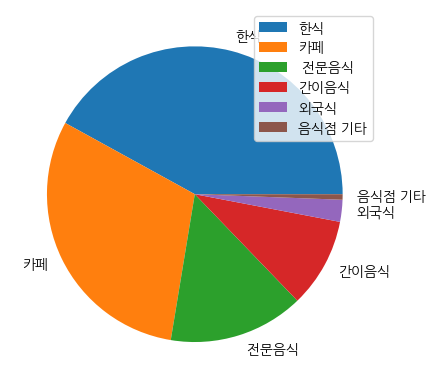

In [112]:
pie = food['소분류 카테고리'].value_counts().values
label = ['한식', '카페',' 전문음식','간이음식','외국식','음식점 기타']
plt.pie(pie, labels =label )
plt.legend(loc = 'best')
plt.show()